In [157]:
# Importo las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuro el estilo de mis gráficos
sns.set_style("whitegrid")

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [158]:
# Cargo los datasets de entrenamiento y prueba
df_test = pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")

# Verifico la cantidad de filas de cada dataframe
print("Datasets cargados correctamente")
print(f"Número de filas en df_train: {df_train.shape[0]}")
print(f"Número de filas en df_test : {df_test.shape[0]}")

Datasets cargados correctamente
Número de filas en df_train: 891
Número de filas en df_test : 418


In [159]:
# Muestro las primeras 5 filas del dataframe de entrenamiento
print("Primeras 5 filas del dataset de entrenamiento (df_train)")
df_train.head()

Primeras 5 filas del dataset de entrenamiento (df_train)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
# Obtengo información general sobre el dataframe de entrenamiento
print("\nInformación general de df_train")
df_train.info()


Información general de df_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
# Obtengo estadísticas descriptivas para las columnas numéricas del dataframe
print("\nEstadísticas descriptivas de df_train (columnas numéricas):")
df_train.describe()


Estadísticas descriptivas de df_train (columnas numéricas):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
# Cuento todos los valores NaN por columna
print("\nConteo de valores nulos en df_train por columna:")
df_train.isnull().sum()


Conteo de valores nulos en df_train por columna:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
# Manejo valores nulos de embarked llenándolos con la moda
print("Valores nulos antes de imputar 'Embarked': ")
print(df_train['Embarked'].isnull().sum())

# Encuentro la moda de Embarked
moda_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(moda_embarked, inplace=True)

print("\nValores nulos después de imputar 'Embarked': ")
print(df_train['Embarked'].isnull().sum())
print(f"Puerto de embarque imputado: {moda_embarked}")


Valores nulos antes de imputar 'Embarked': 
2

Valores nulos después de imputar 'Embarked': 
0
Puerto de embarque imputado: S


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_7292\558801480.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(moda_embarked, inplace=True)


In [164]:
# Manejo valores nulos de Age
print("Valores nulos de Age antes de imputar 'Age': ")
print(df_train['Age'].isnull().sum())

# Relleno los valores nulos de 'Age' con la mediana
median_age = df_train['Age'].median()
df_train['Age'].fillna(median_age, inplace=True)

print("Valores de nulos de Age después de imputar 'Age': ")
print(df_train['Age'].isnull().sum())
print(f"Edad mediana imputada: {median_age}")

Valores nulos de Age antes de imputar 'Age': 
177
Valores de nulos de Age después de imputar 'Age': 
0
Edad mediana imputada: 28.0


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_7292\2657363784.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(median_age, inplace=True)


In [165]:
# Manejo de valores nulos Cabin (+70%)
# Creo una nueva columna: 'HasCabin' en la que 1 = Sí y 0 = No 

df_train['HasCabin'] = df_train['Cabin'].notnull().astype(int)

print("Primeras filas de la columna 'HasCabin': ")
print(df_train['HasCabin'].head())
print("\nConteo de valores en 'HasCabin'")
print(df_train['HasCabin'].value_counts())

Primeras filas de la columna 'HasCabin': 
0    0
1    1
2    0
3    1
4    0
Name: HasCabin, dtype: int64

Conteo de valores en 'HasCabin'
HasCabin
0    687
1    204
Name: count, dtype: int64


In [166]:
# Crear la característica FamilySize
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

print("Conteo de valores de 'FamilySize': ")
print(df_train['FamilySize'].value_counts())

# Crear la característica IsAlone (1 si va solo, 0 si no)

df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)

print("\nConteo de personas que fueron solas (IsAlone): ")
print(df_train['IsAlone'].value_counts())

Conteo de valores de 'FamilySize': 
FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

Conteo de personas que fueron solas (IsAlone): 
IsAlone
1    537
0    354
Name: count, dtype: int64


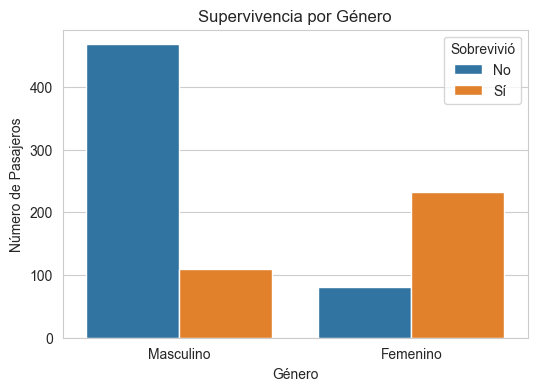


Porcentajes de supervivencia por género: 
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


In [167]:
# Supervivencia por género
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Número de Pasajeros')
plt.xticks(ticks=[0,1], labels=['Masculino', 'Femenino'])
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# Calcular los porcentajes
print("\nPorcentajes de supervivencia por género: ")
print(df_train.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).unstack())

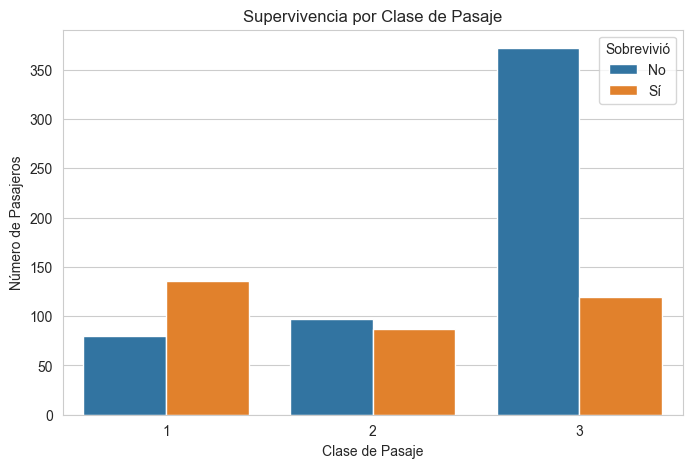


Porcentaje de supervivencia por clase de pasaje: 
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


In [168]:
# Supervivencia por Clase de Pasaje
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Supervivencia por Clase de Pasaje')
plt.xlabel("Clase de Pasaje")
plt.ylabel("Número de Pasajeros")
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# Calcular porcentajes
print("\nPorcentaje de supervivencia por clase de pasaje: ")
print(df_train.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).unstack())

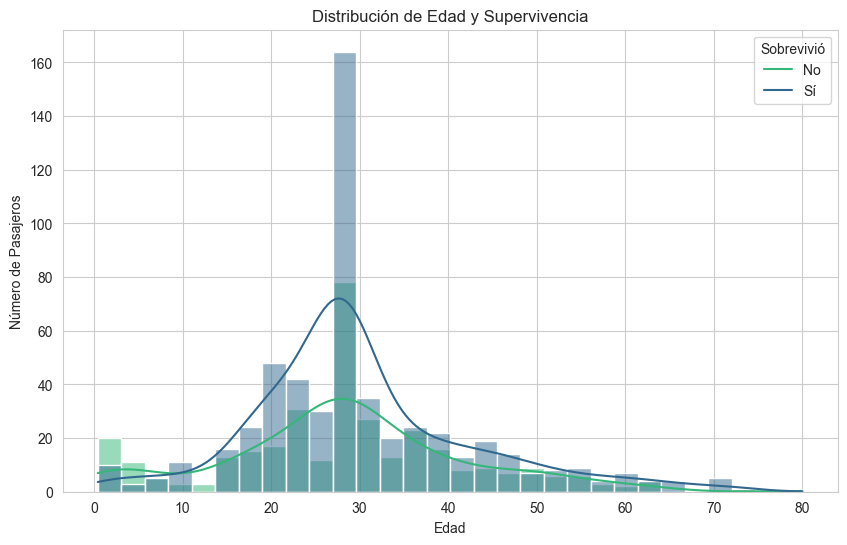

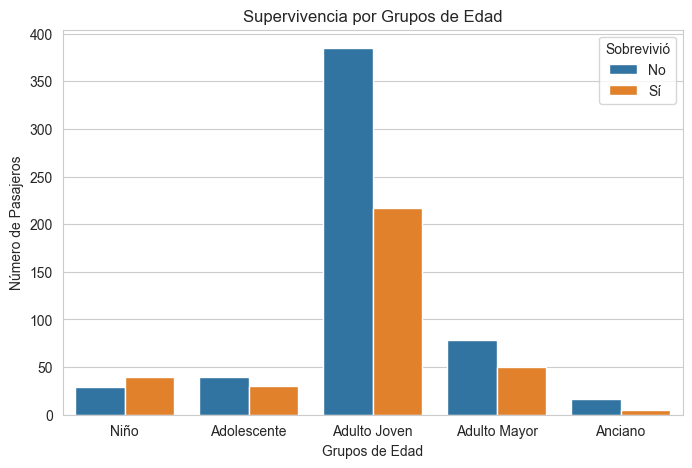

Survived              0          1
AgeGroup                          
Niño          42.028986  57.971014
Adolescente   57.142857  42.857143
Adulto Joven  63.953488  36.046512
Adulto Mayor  60.937500  39.062500
Anciano       77.272727  22.727273


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_7292\1689443683.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_train.groupby('AgeGroup')['Survived'].value_counts(normalize=True).mul(100).unstack())


In [169]:
# Supervivencia por edad
plt.figure(figsize=(10,6))
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True, palette='viridis', bins=30)
plt.title("Distribución de Edad y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Número de Pasajeros")
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])

# Categorizamos las edades
df_train['AgeGroup'] = pd.cut(df_train['Age'], 
                                bins=[0, 12, 18, 40, 60, 100], 
                                labels=['Niño', 'Adolescente', 'Adulto Joven', 'Adulto Mayor', 'Anciano'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='AgeGroup', hue='Survived')
plt.title('Supervivencia por Grupos de Edad')
plt.xlabel('Grupos de Edad')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# Calculo los porcentajes de cada grupo
print(df_train.groupby('AgeGroup')['Survived'].value_counts(normalize=True).mul(100).unstack())

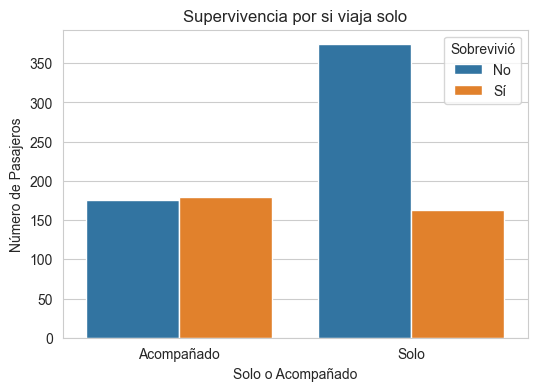

Survived          0          1
IsAlone                       
0         49.435028  50.564972
1         69.646182  30.353818


In [170]:
# Supervivencia por si viaja solo 1 = solo 0 = acompañado
plt.figure(figsize=(6,4))
sns.countplot(x='IsAlone', hue='Survived', data=df_train)
plt.title('Supervivencia por si viaja solo')
plt.xlabel('Solo o Acompañado')
plt.xticks(ticks=[0,1], labels=['Acompañado', 'Solo'])
plt.ylabel('Número de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# Calculo los porcentajes
print(df_train.groupby('IsAlone')['Survived'].value_counts(normalize=True).mul(100).unstack())

## 📝 Resumen de Hallazgos y Conclusiones del EDA del Titanic

Después de realizar un Análisis Exploratorio de Datos (EDA) exhaustivo sobre el dataset de entrenamiento del Titanic, he identificado varios patrones y factores clave que influyeron significativamente en la tasa de supervivencia.

### 1. Manejo de Datos Faltantes

Se abordaron los valores nulos en tres columnas principales:
* **`Embarked` (Puerto de Embarque):** Con pocos valores faltantes (<10), se optó por imputar estos nulos con la moda (el puerto más frecuente), 'S' (Southampton), ya que es una variable categórica y esta estrategia preserva la distribución original.
* **`Age` (Edad):** Con aproximadamente 150 nulos, se imputaron los valores faltantes utilizando la mediana de la edad. Esta elección se debe a la robustez de la mediana frente a valores atípicos (bebés, personas muy mayores) y a su capacidad para representar mejor la tendencia central de la distribución de edades.
* **`Cabin` (Número de Cabina):** Dada la alta proporción de valores nulos (más del 70%), la columna original `Cabin` no se consideró directamente útil para el análisis. En su lugar, se creó una nueva característica binaria, `HasCabin` (1 si el pasajero tenía información de cabina, 0 si no), para capturar la presencia o ausencia de esta información de manera más efectiva.

### 2. Ingeniería de Características Básica

Se crearon dos nuevas características que proporcionan información más relevante para el análisis de supervivencia:
* **`FamilySize`:** Calculada como la suma de `SibSp` (hermanos/cónyuges) y `Parch` (padres/hijos) más uno (para el propio pasajero). Esta característica nos permite entender el tamaño del grupo familiar a bordo.
* **`IsAlone`:** Una característica binaria (1 si `FamilySize` es 1, 0 en caso contrario) que indica si el pasajero viajaba solo. Esta distinción es crucial para analizar el impacto de ir acompañado en la supervivencia.

### 3. Factores Clave de Supervivencia (Basado en Visualizaciones)

Los siguientes factores mostraron una fuerte correlación con la supervivencia:

* **Género (`Sex`):**
    * **Observación:** Las mujeres tuvieron una tasa de supervivencia significativamente más alta que los hombres. Esto se alinea con la política de "mujeres y niños primero" implementada durante la evacuación.
    * **Impacto:** Es, quizás, el factor más determinante para la supervivencia en este dataset.

* **Clase de Pasaje (`Pclass`):**
    * **Observación:** Se observó una clara jerarquía en las tasas de supervivencia: los pasajeros de Primera Clase tuvieron las mayores probabilidades de sobrevivir, seguidos por los de Segunda Clase, y finalmente los de Tercera Clase, que mostraron la tasa de supervivencia más baja.
    * **Impacto:** Esto podría estar relacionado con la ubicación de las cabinas (más cercanas a los botes salvavidas en clases superiores) y el acceso preferencial.

* **Edad (`Age`):**
    * **Observación:** Aunque la distribución de la edad es compleja, las visualizaciones sugieren que los niños (especialmente los más pequeños) tenían una mayor probabilidad de supervivencia, lo cual también coincide con la directriz de evacuación.
    * **Impacto:** La edad parece ser un factor, con una ventaja para los más jóvenes.

* **Estado de Acompañamiento (`IsAlone` / `FamilySize`):**
    * **Observación:** Aquellos pasajeros que viajaban solos (`IsAlone = 1`) tuvieron una tasa de mortalidad considerablemente más alta en comparación con aquellos que viajaban acompañados (cualquier `FamilySize > 1`).
    * **Impacto:** Viajar en grupo (familia o pareja) parece haber conferido una ventaja en la supervivencia, posiblemente debido a la ayuda mutua o la priorización en la evacuación de familias.

### Conclusiones Generales

El análisis del dataset del Titanic revela que la supervivencia no fue aleatoria, sino que estuvo fuertemente influenciada por factores demográficos y socioeconómicos. El género, la clase de pasaje y la situación de acompañamiento emergieron como los predictores más prominentes de si un pasajero sobrevivió al desastre.

---